# Leitura dos arquivos SEED_EEG (pasta sem os dados de movimento dos olhos)

In [ ]:
import os
from glob import glob
import pandas as pd
import numpy as np
import scipy.io
import re


In [ ]:
os.environ['FILE_PATH'] = '../SEED/SEED_EEG/'
FILE_PATH = os.getenv('FILE_PATH', '/mnt/g/Meu Drive/mestrado_ppget')
FILE_PATH

## Preprocessed_EEG folder:

In [ ]:
PREPROCESSED_PATH = os.path.join(FILE_PATH, "SEED_EEG/Preprocessed_EEG/")
ALL_FILES = os.listdir(PREPROCESSED_PATH)
sorted(ALL_FILES)
print(len(ALL_FILES))
All_FILES_FULL_PATH = sorted(glob(PREPROCESSED_PATH+'/**'))


In [ ]:
All_FILES_FULL_PATH

In [ ]:
import scipy.io
mat = scipy.io.loadmat(All_FILES_FULL_PATH[0]) 
mat

In [ ]:
mat.keys()

In [ ]:
len(mat.keys())

In [ ]:
mat['ww_eeg1'].shape

In [ ]:
cur_eeg_file = All_FILES_FULL_PATH[0]
cur_eeg_file

In [ ]:
labels = scipy.io.loadmat(os.path.join(FILE_PATH, 'SEED_EEG/ExtractedFeatures/label.mat')) 
print(len(labels['label'][0]))
print(labels['label'][0])

In [ ]:
seen_movies = list(cur_egg_data.keys())[3:]
eeg_62channels_data = cur_egg_data[seen_movies[0]]
len(eeg_62channels_data)

eeg_each_chanel_data = eeg_62channels_data[0]
pd.DataFrame(eeg_each_chanel_data)



In [ ]:
channel_order = pd.read_excel(os.path.join(FILE_PATH, "SEED_EEG/channel-order.xlsx"), header=None).reset_index()
# channel_order['index'] = channel_order.index+1
channel_order
# channel_order[channel_order['index'] == eeg_62channels_idx][0].values[0]

In [ ]:
all_data = pd.DataFrame()

for cur_eeg_file in All_FILES_FULL_PATH:
    subject_id, experiment_date = os.path.basename(cur_eeg_file).split('_')
    cur_egg_data = scipy.io.loadmat(cur_eeg_file) 
    seen_movies = list(cur_egg_data.keys())[3:]
    for cur_seen_movies in seen_movies:
        eeg_62channels_data = cur_egg_data[cur_seen_movies]
        eeg_62channels_idx = 0
        for eeg_each_chanel_data in eeg_62channels_data:
            # each_chanel_as_df = pd.DataFrame(eeg_each_chanel_data)
            eeg_channel = channel_order[channel_order['index'] == eeg_62channels_idx][0].values[0]
            print(cur_eeg_file, subject_id, experiment_date, cur_seen_movies,eeg_channel)
            all_data = all_data.append({"subject_id":subject_id, "experiment_date":experiment_date, "cur_seen_movie":cur_seen_movies,"eeg_channel":eeg_channel, "eeg_data":list(eeg_each_chanel_data)},ignore_index=True)
            eeg_62channels_idx+=1
            # break
        break
    all_data.to_excel("dados_compilados.xlsx")
    break

## ExtractedFeatures Folder:

### Ja possui differential entropy (DE), differential asymmetry (DASM), asymmetry (RASM)  


* differential entropy (DE): 
    * Identifying Stable Patterns over Time for Emotion Recognition from EEG - artigo original SEED 
    * EEG Emotion Recognition Using Dynamical Graph Convolutional Neural Networks - aplicação direta com SEED (dynamical graph convolutional neural networks (DGCNN))
    * Multi-method Fusion of Cross-Subject Emotion Recognition Based on High-Dimensional EEG Features



From our previous work[40], [41], [42], we have found that the following six different features and electrode combina- tions are efficient for EEG-based emotion recognition: power spectral density (PSD), differential entropy (DE), dif- ferential asymmetry (DASM), rational asymmetry (RASM), asymmetry (ASM) and differential caudality (DCAU) fea- tures from the EEG. As

In [ ]:
EXTRACTED_FEATURES_PATH = os.path.join(FILE_PATH,"SEED_EEG/ExtractedFeatures/")
ALL_FILES = os.listdir(EXTRACTED_FEATURES_PATH)
sorted(ALL_FILES)
print(len(ALL_FILES))
All_FILES_FULL_PATH = sorted(glob(EXTRACTED_FEATURES_PATH+'/**'))
All_FILES_FULL_PATH


In [ ]:
All_FILES_FULL_PATH[0]

In [ ]:
import scipy.io
mat = scipy.io.loadmat(All_FILES_FULL_PATH[0]) 
mat

In [ ]:
mat.keys()

###  15 chaves para cada uma das features [asm', 'psd', 'rasm', 'dasm', 'dcau', 'de']
* 'asm_LDS', 'asm_movingAve',
* 'dasm_LDS', 'dasm_movingAve',
* 'dcau_LDS', 'dcau_movingAve',
* 'de_LDS', 'de_movingAve',
* 'psd_LDS', 'psd_movingAve',
* 'rasm_LDS', 'rasm_movingAve'


### 6 features (de, psd, etc) X 2 possibilidades (LDS, movAve) x 15 videos = 180

In [ ]:
len(mat.keys()) -3

In [ ]:
# all_feautres = [each_feature.split('_')[0] for each_feature in sorted(list(mat.keys()))]
all_feautres = [re.findall('\D+', each_feature)[0] for each_feature in sorted(list(mat.keys()))]
sorted(list(set(all_feautres)))

In [ ]:
filter_features = [each_feature for each_feature in sorted(list(mat.keys())) if 'de_LDS' in each_feature]
filter_features

In [ ]:
mat['de_LDS1'].shape

In [ ]:
mat['de_LDS13'].shape

In [ ]:
mat['de_LDS1'][0].shape

# Leitura do Pickel do modelo

### de_lds

In [ ]:
import pandas as pd
import os
from datetime import datetime

In [ ]:
model_folder = "11_dnn_eeg_1s_baseline"
#model_folder = "13_svm_eeg_1s_baseline"

all_lr = os.listdir(model_folder)
print(all_lr)
if len(all_lr) == 1:
    idx_feature = 0
else:
    idx_feature = 2
cur_feature = all_lr[idx_feature]
print(idx_feature)
print(cur_feature)

In [ ]:
#cur_feature = "de_LDS0"
cur_experiment = "10_20131130"

cur_model_path = os.path.join(os.getcwd(), model_folder, cur_feature, cur_experiment)
print(cur_model_path)
model_result = pd.read_pickle(cur_model_path)

In [ ]:
model_result

In [ ]:
model_result.keys()

In [ ]:
model_result["true_label"].shape

Utilizando o artigo original do seed eu quero verificar os resultados.

In [ ]:
!find 11_dnn_eeg_1s_baseline -name {cur_experiment} >> {cur_experiment}.txt

In [ ]:
with open(f"{cur_experiment}.txt", "r") as f:
    files_from_session = f.read()

files_from_session_as_list = files_from_session.split("\n")
files_from_session_as_list = [cur_file_session for cur_file_session in files_from_session_as_list if len(cur_file_session)>1]
files_from_session_as_list

In [ ]:
accuracy_dict = {}
for each_file in files_from_session_as_list:
    print(each_file)
    model_result = pd.read_pickle(each_file)
    accuracy_dict[each_file] = model_result['acc']

In [ ]:
accuracy_dict

In [ ]:
dict(sorted(accuracy_dict.items(), key=lambda item: item[1], reverse=True))


# Explorando resultados SVM

## Verificando vetor de decisao

In [ ]:
model_result

In [ ]:
model_result['test_label'].shape

In [ ]:
# os primeiros 237 valores sao do 10 video, que de acordo com o arquivo seed-stimulation possuem o sentimento 2
# model_result['test_label'][0:237].shape
# os proximos 235 valores sao do 11 video, que de acordo com o arquivo seed-stimulation possuem o sentimento 2
# model_result['test_label'][237:472].shape
# os proximos 233 valores sao do 12 video, que de acordo com o arquivo seed-stimulation possuem o sentimento 1
model_result['test_label'][472:705]#.shape

In [ ]:
# comprovando que O SVM fez a predicao correta.
model_result['decision_val'][472:705]

## Verificando acuracia SVM

In [ ]:
cur_experiment = '20230825_SVM_ACCURACY'

In [ ]:
!find 20230825_svm_eeg_1s_baseline_all -type f >> {cur_experiment}.txt

In [ ]:
with open(f"{cur_experiment}.txt", "r") as f:
    files_from_session = f.read()

files_from_session_as_list = files_from_session.split("\n")
files_from_session_as_list = [cur_file_session for cur_file_session in files_from_session_as_list if len(cur_file_session)>1]
files_from_session_as_list

In [ ]:
accuracy_dict = {}
for each_file in files_from_session_as_list:
    print(each_file)
    model_result = pd.read_pickle(each_file)
    accuracy_dict[each_file] = [model_result['acc'], model_result['c']]

In [ ]:
all_models_results_ordered = dict(sorted(accuracy_dict.items(), key=lambda item: item[1], reverse=True))
all_models_results_ordered

In [ ]:
result_df = pd.DataFrame(all_models_results_ordered.items())
result_df

In [ ]:
result_df[['acc', 'param']] = pd.DataFrame(result_df[1].to_list())
result_df['param'] = result_df['param'].apply(lambda x: {"c":x})
result_df

In [ ]:
result_df[["folder", "feature", "user"]] = pd.DataFrame(result_df[0].str.split('/').to_list())
result_df

In [ ]:
result_df[["user", "session"]]  = pd.DataFrame(result_df['user'].str.split('_').to_list())
result_df

In [ ]:
result_df[['user', 'session', 'feature', 'param', 'acc']].sort_values(['user', 'acc'], ascending=[False, False]).to_csv(f"{cur_experiment}.csv")

In [ ]:
import os
# eeg_dir = '../Features/China/feature_smooth_eeg_1s/'
os.environ['FILE_PATH'] = '../SEED/SEED_EEG/'
FILE_PATH = os.getenv('FILE_PATH', '/mnt/g/Meu Drive/mestrado_ppget')
print(FILE_PATH)
eeg_dir = os.path.join(FILE_PATH,"SEED_EEG/ExtractedFeatures/")
eeg_file_list = os.listdir(eeg_dir)
eeg_file_list.sort()

In [ ]:
eeg_file_list.index('13_20140527.mat')

In [ ]:
eeg_file_list[10:]

## SVM for each band

In [46]:
from datetime import datetime
datetime_now = datetime.now().strftime("%Y%m%d_%H%M")
external_data_ref = datetime.today().date().strftime("%Y%m%d")

full_svm_result_df = pd.DataFrame()
all_features = ['de_LDS','psd_LDS', 'rasm_LDS', 'dasm_LDS', 'asm_LDS','dcau_LDS']

for cur_feature in all_features:
    for cur_freq_band in ["delta","theta", "alpha", "beta", "gamma","all"]:
        filename_to_write = f"{datetime_now}_all_SVM_predictions_{cur_freq_band}.txt"

        os.system(f"find 20230829_svm_eeg_1s_baseline_{cur_freq_band}/{cur_feature} -type f > {filename_to_write}")

        with open(filename_to_write, "r") as f:
            files_from_session = f.read()

        files_from_session_as_list = files_from_session.split("\n")
        files_from_session_as_list = [cur_file_session for cur_file_session in files_from_session_as_list if len(cur_file_session)>1]
        #print(len(files_from_session_as_list))
        #print(files_from_session_as_list)

        accuracy_dict = {}
        for each_file in files_from_session_as_list:
            # print(each_file)
            model_result = pd.read_pickle(each_file)
            accuracy_dict[each_file] = [model_result['acc'], model_result['c']]

        all_models_results_ordered = dict(sorted(accuracy_dict.items(), key=lambda item: item[1], reverse=True))

        svm_result_df = pd.DataFrame(all_models_results_ordered.items())
        svm_result_df[['acc', 'param']] = pd.DataFrame(svm_result_df[1].to_list())
        svm_result_df['param'] = svm_result_df['param'].apply(lambda x: {"c":x})
        svm_result_df[["folder", "feature", "user"]] = pd.DataFrame(svm_result_df[0].str.split('/').to_list())
        svm_result_df[["user", "session"]]  = pd.DataFrame(svm_result_df['user'].str.split('_').to_list())
        svm_result_df = svm_result_df[['user', 'session', 'feature', 'param', 'acc']].sort_values(['user', 'acc'], ascending=[False, False])

        # svm_result_df.to_csv(f"{external_data_ref}_SVM_result_summary_{cur_freq_band}.csv")

        # print(f"{cur_freq_band} - mean:{svm_result_df.acc.mean():0.4f} / std:{svm_result_df.acc.std():0.4f}")
        print(f"{cur_freq_band} - {svm_result_df.acc.mean():0.4f}/{svm_result_df.acc.std():0.4f}")

        svm_result_df['freq'] = cur_freq_band
        full_svm_result_df = pd.concat([full_svm_result_df, svm_result_df])

    full_svm_result_df.reset_index().to_csv(f"{external_data_ref}_SVM_result_summary_each_band_{cur_feature}.csv")


delta - 0.6301/0.1289
theta - 0.6961/0.1378
alpha - 0.7153/0.1422
beta - 0.7982/0.1371
gamma - 0.7825/0.1501
all - 0.8444/0.1158
delta - 0.6191/0.1410
theta - 0.6943/0.1241
alpha - 0.6633/0.1642
beta - 0.7104/0.1701
gamma - 0.7196/0.1502
all - 0.7799/0.1391
delta - 0.4899/0.1289
theta - 0.5349/0.1454
alpha - 0.6121/0.1496
beta - 0.7448/0.1764
gamma - 0.7711/0.1583
all - 0.7688/0.1446
delta - 0.4983/0.1283
theta - 0.5353/0.1490
alpha - 0.6195/0.1502
beta - 0.7387/0.1767
gamma - 0.7722/0.1590
all - 0.7680/0.1444
delta - 0.4909/0.1304
theta - 0.5377/0.1503
alpha - 0.6148/0.1458
beta - 0.7344/0.1771
gamma - 0.7617/0.1607
all - 0.7645/0.1437
delta - 0.5749/0.1575
theta - 0.6016/0.1462
alpha - 0.6477/0.1430
beta - 0.7490/0.1634
gamma - 0.7767/0.1685
all - 0.8143/0.1162


In [47]:
full_svm_result_df['acc'] = full_svm_result_df['acc'].round(4)*100
full_svm_result_df['user'] = full_svm_result_df['user'].astype(int)

In [48]:
# Media Por individuo
full_svm_result_df.pivot_table(index=['feature','user'], columns=['freq'],values=['acc'])\
    .reindex(["delta","theta", "alpha", "beta", "gamma", "all"],axis=1,level=1)\
    .reindex(['de_LDS','psd_LDS', 'rasm_LDS', 'dasm_LDS', 'asm_LDS','dcau_LDS'],axis=0, level=0)


acc                                              \
freq               delta      theta      alpha       beta      gamma   
feature  user                                                          
de_LDS   1     58.720000  73.530000  61.873333  72.880000  76.060000   
         2     73.410000  51.806667  66.283333  64.666667  64.980000   
         3     67.290000  68.066667  75.963333  81.263333  77.626667   
         4     58.236667  69.993333  72.400000  68.980000  73.410000   
         5     65.196667  81.670000  66.473333  75.436667  58.093333   
...                  ...        ...        ...        ...        ...   
dcau_LDS 11    60.596667  53.346667  87.403333  90.606667  89.860000   
         12    52.120000  73.290000  69.340000  78.420000  84.150000   
         13    61.296667  69.940000  61.006667  82.560000  92.076667   
         14    58.380000  54.336667  66.016667  71.483333  75.096667   
         15    71.893333  49.806667  72.326667  90.943333  94.410000   

                          
freq                 all  
feature  user             
de_LDS   1     77.766667  
         2     86.463333  
         3     89.523333  
         4     72.833333  
         5     80.153333  
...                  ...  
dcau_LDS 11    86.730000  
         12    86.296667  
         13    83.213333  
         14    77.406667  
         15    94.606667  

[90 rows x 6 columns]

In [49]:
# Media Por feature
analysing_std_and_mean = full_svm_result_df.pivot_table(index=['feature'], columns=['freq'],values=['acc'],aggfunc={'acc':[np.mean,np.std]})
# \
#     .reindex(["delta","theta", "alpha", "beta", "gamma", "all"],axis=1,level=1)\
#     .reindex(['de_LDS','psd_LDS', 'rasm_LDS', 'dasm_LDS', 'asm_LDS','dcau_LDS'],axis=0)
analysing_std_and_mean

acc                                                         \
               mean                                                          
freq            all      alpha       beta      delta      gamma      theta   
feature                                                                      
asm_LDS   76.452889  61.482222  73.442444  49.093333  76.171556  53.764444   
dasm_LDS  76.801333  61.954000  73.871111  49.826889  77.224222  53.527556   
dcau_LDS  81.428444  64.770444  74.900000  57.490000  77.667556  60.157111   
de_LDS    84.439333  71.530667  79.824000  63.005778  78.253333  69.614667   
psd_LDS   77.994889  66.334444  71.038222  61.912444  71.962889  69.426667   
rasm_LDS  76.877778  61.212444  74.478000  48.993778  77.111333  53.487111   

                                                                            
                std                                                         
freq            all      alpha       beta      delta      gamma      theta  
feature                                                                     
asm_LDS   14.370204  14.580634  17.711631  13.039906  16.072736  15.029487  
dasm_LDS  14.441105  15.016069  17.674402  12.830926  15.897314  14.904275  
dcau_LDS  11.623271  14.299843  16.337169  15.751355  16.848737  14.618634  
de_LDS    11.576629  14.219806  13.712045  12.891150  15.009233  13.778185  
psd_LDS   13.910390  16.424886  17.008295  14.102146  15.023268  12.411887  
rasm_LDS  14.459169  14.957801  17.640809  12.887822  15.833787  14.535379

In [50]:
analysing_std_and_mean.columns = analysing_std_and_mean.columns.reorder_levels(order=[0,2,1])
# print(analysing_std_and_mean.columns)
analysing_std_and_mean.columns = ['_'.join(col) for col in analysing_std_and_mean.columns]
# column_to_concatenate='acc_all'
new_column_list = []
for column_to_concatenate in ['acc_all','acc_alpha','acc_beta','acc_delta','acc_gamma','acc_theta']:
    new_column = f'{column_to_concatenate}_together'
    analysing_std_and_mean[new_column] = analysing_std_and_mean[f'{column_to_concatenate}_mean'].round(2).astype(str) + '/'+ analysing_std_and_mean[f'{column_to_concatenate}_std'].round(2).astype(str) 
    new_column_list.append(new_column)
analysing_std_and_mean[new_column_list]


,acc_all_together,acc_alpha_together,acc_beta_together,acc_delta_together,acc_gamma_together,acc_theta_together
feature,,,,,,
asm_LDS,76.45/14.37,61.48/14.58,73.44/17.71,49.09/13.04,76.17/16.07,53.76/15.03
dasm_LDS,76.8/14.44,61.95/15.02,73.87/17.67,49.83/12.83,77.22/15.9,53.53/14.9
dcau_LDS,81.43/11.62,64.77/14.3,74.9/16.34,57.49/15.75,77.67/16.85,60.16/14.62
de_LDS,84.44/11.58,71.53/14.22,79.82/13.71,63.01/12.89,78.25/15.01,69.61/13.78
psd_LDS,77.99/13.91,66.33/16.42,71.04/17.01,61.91/14.1,71.96/15.02,69.43/12.41
rasm_LDS,76.88/14.46,61.21/14.96,74.48/17.64,48.99/12.89,77.11/15.83,53.49/14.54


In [51]:
analysing_std_and_mean[['acc_delta_together','acc_theta_together','acc_alpha_together','acc_beta_together','acc_gamma_together','acc_all_together']]\
    .reindex(['de_LDS','psd_LDS', 'rasm_LDS', 'dasm_LDS', 'asm_LDS','dcau_LDS'],axis=0)


,acc_delta_together,acc_theta_together,acc_alpha_together,acc_beta_together,acc_gamma_together,acc_all_together
feature,,,,,,
de_LDS,63.01/12.89,69.61/13.78,71.53/14.22,79.82/13.71,78.25/15.01,84.44/11.58
psd_LDS,61.91/14.1,69.43/12.41,66.33/16.42,71.04/17.01,71.96/15.02,77.99/13.91
rasm_LDS,48.99/12.89,53.49/14.54,61.21/14.96,74.48/17.64,77.11/15.83,76.88/14.46
dasm_LDS,49.83/12.83,53.53/14.9,61.95/15.02,73.87/17.67,77.22/15.9,76.8/14.44
asm_LDS,49.09/13.04,53.76/15.03,61.48/14.58,73.44/17.71,76.17/16.07,76.45/14.37
dcau_LDS,57.49/15.75,60.16/14.62,64.77/14.3,74.9/16.34,77.67/16.85,81.43/11.62


In [ ]:
analysing_std_and_mean[['acc_all_together']]\
    .reindex(['de_LDS','psd_LDS', 'rasm_LDS', 'dasm_LDS', 'asm_LDS','dcau_LDS'],axis=0)


# Explorando resultados DNN

In [ ]:
datetime_now = datetime.now().strftime("%Y%m%d_%H%M")

In [ ]:
!find 14_dnn_eeg_1s_baseline -type f > {datetime_now}_all_dnn_predictions.txt

In [ ]:
with open(f"{datetime_now}_all_dnn_predictions.txt", "r") as f:
    files_from_session = f.read()

files_from_session_as_list = files_from_session.split("\n")
files_from_session_as_list = [cur_file_session for cur_file_session in files_from_session_as_list if len(cur_file_session)>1]
print(len(files_from_session_as_list))
print(files_from_session_as_list)

In [ ]:
import pandas as pd

In [ ]:
model_result = pd.read_pickle(files_from_session_as_list[0])
model_result


In [ ]:
type(model_result['acc'])

In [ ]:
model_result['acc'].item()

In [ ]:
accuracy_dict = {}
for each_file in files_from_session_as_list:
    print(each_file)
    model_result = pd.read_pickle(each_file)
    accuracy_dict[each_file] = model_result['acc'].item()

In [ ]:
all_models_results_ordered = dict(sorted(accuracy_dict.items(), key=lambda item: item[1], reverse=True))
print(len(all_models_results_ordered))
all_models_results_ordered


In [ ]:
dnn_result_df = pd.DataFrame(all_models_results_ordered.items())
dnn_result_df = dnn_result_df.rename(columns={1:'acc'})

In [ ]:
dnn_result_df[["folder", "feature", "user"]] = pd.DataFrame(dnn_result_df[0].str.split('/').to_list())

In [ ]:
dnn_result_df[["user", "session"]]  = pd.DataFrame(dnn_result_df['user'].str.split('_').to_list())
dnn_result_df

In [ ]:
import re

In [ ]:
#dnn_result_df['feature'].apply(lambda x: re.findall("\d*\.?\d*$/", x))
dnn_result_df['param'] = dnn_result_df['feature'].apply(lambda x: re.findall("-?[\d.]+(?:e-?\d+)?", x))
dnn_result_df['param'] = dnn_result_df['param'].apply(lambda x: {f"lr{x[0]}:{x[1]}"})

In [ ]:
dnn_result_df[['user', 'session', 'feature', 'param', 'acc']].sort_values(['user', 'acc'], ascending=[False, False])

In [ ]:
# dnn_result_df[dnn_result_df.user == '12']

In [ ]:
from datetime import datetime

In [ ]:
external_data_ref = datetime.today().date().strftime("%Y%m%d")
external_data_ref

In [ ]:
dnn_result_df[['user', 'session', 'feature', 'param', 'acc']].sort_values(['user', 'acc'], ascending=[False, False]).to_csv(f"{external_data_ref}_dnn_result.csv")

In [ ]:
eda_dnn = dnn_result_df[['user', 'session', 'feature', 'param', 'acc']].sort_values(['user', 'acc'], ascending=[False, False])
eda_dnn

In [ ]:
eda_dnn.groupby(['user', 'session'])['param', 'acc'].agg({'acc':'max'})

In [ ]:
eda_dnn.groupby(['user', 'session']).max().acc.mean()

In [ ]:
# https://stackoverflow.com/questions/44185787/result-based-in-other-column-using-pandas-aggregation
# ed_dnn_2 = eda_dnn.groupby(['user', 'session'])['param', 'acc'].agg({'acc':'max', 'param':lambda x: eda_dnn['param'][x.idmax()]}).reset_index()
ed_dnn_2 = eda_dnn.groupby(['user', 'session'])['param', 'acc'].agg({'acc':'max'}).reset_index()

ed_dnn_2

In [ ]:
x = ['10', '20131130', 0.7377167344093323]
dnn_result_df[(dnn_result_df['user']==x[0]) & (dnn_result_df['session']==x[1]) & (dnn_result_df['acc']==x[2])]

In [ ]:
ed_dnn_2

In [ ]:
#ed_dnn_2.apply(lambda x: dnn_result_df[(dnn_result_df['user']==x[0]) & (dnn_result_df['session']==x[1]) & (dnn_result_df['acc']==x[2])], axis=1)]

#quase la
#ed_dnn_2.apply(lambda x: dnn_result_df[(dnn_result_df['user']==x[0]) & (dnn_result_df['session']==x[1]) & (dnn_result_df['acc']==x[2])]['param'], axis=1)


# ed_dnn_2['params'] = 

for idx, x in ed_dnn_2.iterrows():
    ed_dnn_2.loc[idx,'params_2'] = dnn_result_df[(dnn_result_df['user']==x[0]) & (dnn_result_df['session']==x[1]) & (dnn_result_df['acc']==x[2])].iloc[0,6]


# ed_dnn_2.apply(lambda x: dnn_result_df[(dnn_result_df['user']==x[0]) & (dnn_result_df['session']==x[1]) & (dnn_result_df['acc']==x[2])]['param'], axis=1)

In [ ]:
ed_dnn_2.to_csv(f"{external_data_ref}_dnn_result_summary.csv")

In [ ]:
dnn_result_df[(dnn_result_df['user']==x[0]) & (dnn_result_df['session']==x[1]) & (dnn_result_df['acc']==x[2])].iloc[0,6]

In [ ]:
ed_dnn_2

In [ ]:
print(f"mean:{ed_dnn_2.acc.mean():0.4f} / std:{ed_dnn_2.acc.std():0.4f}")

In [ ]:
ed_dnn_2.groupby(['user']).mean().acc.std()

# Explorando Resultados LOGISTIC REGRESSION

In [ ]:
from datetime import datetime

In [ ]:
datetime_now = datetime.now().strftime("%Y%m%d_%H%M")
filename_to_write = f"{datetime_now}_all_logRegression_predictions.txt"

In [ ]:
!find 20230827_lr_eeg_1s_baseline_all -type f > {filename_to_write}

In [ ]:
with open(filename_to_write, "r") as f:
    files_from_session = f.read()

files_from_session_as_list = files_from_session.split("\n")
files_from_session_as_list = [cur_file_session for cur_file_session in files_from_session_as_list if len(cur_file_session)>1]
print(len(files_from_session_as_list))
print(files_from_session_as_list)

In [ ]:
model_result = pd.read_pickle(files_from_session_as_list[0])
model_result

In [ ]:
accuracy_dict = {}
for each_file in files_from_session_as_list:
    # print(each_file)
    model_result = pd.read_pickle(each_file)
    accuracy_dict[each_file] = model_result['acc'].item()
accuracy_dict

In [ ]:
all_models_results_ordered = dict(sorted(accuracy_dict.items(), key=lambda item: item[1], reverse=True))
print(len(all_models_results_ordered))
all_models_results_ordered


In [ ]:
logrec_result_df = pd.DataFrame(all_models_results_ordered.items())
logrec_result_df = logrec_result_df.rename(columns={1:'acc'})
logrec_result_df

In [ ]:
logrec_result_df[["folder", "feature", "user"]] = pd.DataFrame(logrec_result_df[0].str.split('/').to_list())
logrec_result_df[["user", "session"]]  = pd.DataFrame(logrec_result_df['user'].str.split('_').to_list())
logrec_result_df

In [ ]:
external_data_ref = datetime_now
logrec_result_df = logrec_result_df[['user', 'session', 'feature', 'acc']].sort_values(['user', 'acc'], ascending=[False, False])
logrec_result_df.to_csv(f"{external_data_ref}_logreg_result_summary.csv")
logrec_result_df

In [ ]:
print(f"mean:{logrec_result_df.acc.mean():0.4f} / std:{logrec_result_df.acc.std():0.4f}")

In [ ]:
print("accuracy per user:")
logrec_result_df.groupby(['user','session','feature']).mean().sort_values('acc', ascending=False)

# LR for each band

In [ ]:
datetime_now = datetime.now().strftime("%Y%m%d_%H%M")
external_data_ref = datetime.today().date().strftime("%Y%m%d")

full_lr_result_df = pd.DataFrame()
all_features = ['de_LDS','psd_LDS', 'rasm_LDS', 'dasm_LDS', 'asm_LDS','dcau_LDS']

for cur_feature in all_features:
    for cur_freq_band in ["delta","theta", "alpha", "beta", "gamma","all"]:
        filename_to_write = f"{datetime_now}_all_LR_predictions_{cur_freq_band}.txt"

        os.system(f"find 20230827_lr_eeg_1s_baseline_{cur_freq_band}/{cur_feature} -type f > {filename_to_write}")

        with open(filename_to_write, "r") as f:
            files_from_session = f.read()

        files_from_session_as_list = files_from_session.split("\n")
        files_from_session_as_list = [cur_file_session for cur_file_session in files_from_session_as_list if len(cur_file_session)>1]
        #print(len(files_from_session_as_list))
        #print(files_from_session_as_list)

        accuracy_dict = {}
        for each_file in files_from_session_as_list:
            # print(each_file)
            model_result = pd.read_pickle(each_file)
            accuracy_dict[each_file] = [model_result['acc'], model_result['n']]

        all_models_results_ordered = dict(sorted(accuracy_dict.items(), key=lambda item: item[1], reverse=True))

        lr_result_df = pd.DataFrame(all_models_results_ordered.items())
        lr_result_df[['acc', 'param']] = pd.DataFrame(lr_result_df[1].to_list())
        lr_result_df['param'] = lr_result_df['param'].apply(lambda x: {"n":x})
        lr_result_df[["folder", "feature", "user"]] = pd.DataFrame(lr_result_df[0].str.split('/').to_list())
        lr_result_df[["user", "session"]]  = pd.DataFrame(lr_result_df['user'].str.split('_').to_list())
        lr_result_df = lr_result_df[['user', 'session', 'feature', 'param', 'acc']].sort_values(['user', 'acc'], ascending=[False, False])

        # lr_result_df.to_csv(f"{external_data_ref}_knn_result_summary_{cur_freq_band}.csv")

        # print(f"{cur_freq_band} - mean:{lr_result_df.acc.mean():0.4f} / std:{lr_result_df.acc.std():0.4f}")
        print(f"{lr_result_df.acc.mean():0.4f}/{lr_result_df.acc.std():0.4f}")

        lr_result_df['freq'] = cur_freq_band
        full_lr_result_df = pd.concat([full_lr_result_df, lr_result_df])

    full_lr_result_df.reset_index().to_csv(f"{datetime_now}_lr_result_summary_each_band_{cur_feature}.csv")
    print('\n\n')

In [ ]:
full_lr_result_df

In [ ]:
full_lr_result_df['acc'] = full_lr_result_df['acc'].round(4)*100
#full_lr_result_df['acc'] = full_lr_result_df['acc'].round(4)/100

full_lr_result_df['user'] = full_lr_result_df['user'].astype(int)

In [ ]:
full_lr_result_df.groupby(['freq'])['acc'].mean()

In [ ]:
pivoted_table = full_lr_result_df.pivot_table(index=['feature','user','session'], columns=['freq'],values=['acc'])
pivoted_table

In [ ]:
pivoted_table.columns

In [ ]:
#sorted(pivoted_table.index.levels[1].astype(int))
#df1.index..astype(str)
#df1.index.set_levels([idx.levels[:-1], idx.levels[-1].astype(str)]) = 


In [ ]:
pivoted_table = pivoted_table.reindex(["delta","theta", "alpha", "beta", "gamma", "all"],axis=1,level=1)\
    .reindex(['de_LDS','psd_LDS', 'rasm_LDS', 'dasm_LDS', 'asm_LDS','dcau_LDS'],axis=0, level=0)
pivoted_table

In [ ]:
pivoted_table.round(2).to_csv(f'{datetime_now}_lr_result_summary_FULL_REPORT.csv')

In [ ]:
# Media Por individuo
full_lr_result_df.pivot_table(index=['feature','user'], columns=['freq'],values=['acc'])\
    .reindex(["delta","theta", "alpha", "beta", "gamma", "all"],axis=1,level=1)\
    .reindex(['de_LDS','psd_LDS', 'rasm_LDS', 'dasm_LDS', 'asm_LDS','dcau_LDS'],axis=0, level=0)


In [ ]:
full_lr_result_df.pivot_table(index=['feature'], columns=['freq'],values=['acc'],aggfunc={'acc':[np.mean]})\
    .reindex(['de_LDS','psd_LDS', 'rasm_LDS', 'dasm_LDS', 'asm_LDS','dcau_LDS'],axis=0)


In [ ]:
# Media Por feature
analysing_std_and_mean = full_lr_result_df.pivot_table(index=['feature'], columns=['freq'],values=['acc'],aggfunc={'acc':[np.mean,np.std]})
# \
#     .reindex(["delta","theta", "alpha", "beta", "gamma", "all"],axis=1,level=1)\
#     .reindex(['de_LDS','psd_LDS', 'rasm_LDS', 'dasm_LDS', 'asm_LDS','dcau_LDS'],axis=0)
analysing_std_and_mean

In [ ]:
analysing_std_and_mean.columns

In [ ]:
analysing_std_and_mean.columns = analysing_std_and_mean.columns.reorder_levels(order=[0,2,1])
print(analysing_std_and_mean.columns)
analysing_std_and_mean

In [ ]:
#quase la
analysing_std_and_mean.stack()

In [ ]:
# analysing_std_and_mean.columns.get_level_values(0)

In [ ]:
analysing_std_and_mean.columns

In [ ]:
analysing_std_and_mean.columns = ['_'.join(col) for col in analysing_std_and_mean.columns]
analysing_std_and_mean

In [ ]:
# column_to_concatenate='acc_all'
new_column_list = []
for column_to_concatenate in ['acc_all','acc_alpha','acc_beta','acc_delta','acc_gamma','acc_theta']:
    new_column = f'{column_to_concatenate}_together'
    analysing_std_and_mean[new_column] = analysing_std_and_mean[f'{column_to_concatenate}_mean'].round(2).astype(str) + '/'+ analysing_std_and_mean[f'{column_to_concatenate}_std'].round(2).astype(str) 
    new_column_list.append(new_column)
analysing_std_and_mean[new_column_list]
#analysing_std_and_mean.loc[:,'acc_all_mean']

In [ ]:
# "delta","theta", "alpha", "beta", "gamma", "all"],
analysing_std_and_mean[['acc_delta_together','acc_theta_together','acc_alpha_together','acc_beta_together','acc_gamma_together','acc_all_together']]\
    .reindex(['de_LDS','psd_LDS', 'rasm_LDS', 'dasm_LDS', 'asm_LDS','dcau_LDS'],axis=0)


In [ ]:
analysing_std_and_mean[['acc_all_together']]\
    .reindex(['de_LDS','psd_LDS', 'rasm_LDS', 'dasm_LDS', 'asm_LDS','dcau_LDS'],axis=0)


# Explorando Resultados KNN

In [ ]:
datetime_now = datetime.now().strftime("%Y%m%d_%H%M")
filename_to_write = f"{datetime_now}_all_KNN_predictions.txt"

In [ ]:
!find 17_KNN_eeg_1s_baseline -type f > {filename_to_write}

In [ ]:
with open(filename_to_write, "r") as f:
    files_from_session = f.read()

files_from_session_as_list = files_from_session.split("\n")
files_from_session_as_list = [cur_file_session for cur_file_session in files_from_session_as_list if len(cur_file_session)>1]
print(len(files_from_session_as_list))
print(files_from_session_as_list)

In [ ]:
model_result = pd.read_pickle(files_from_session_as_list[0])
model_result

In [ ]:
accuracy_dict = {}
for each_file in files_from_session_as_list:
    # print(each_file)
    model_result = pd.read_pickle(each_file)
    accuracy_dict[each_file] = [model_result['acc'], model_result['n']]
accuracy_dict

In [ ]:
all_models_results_ordered = dict(sorted(accuracy_dict.items(), key=lambda item: item[1], reverse=True))
print(len(all_models_results_ordered))
all_models_results_ordered


In [ ]:
knn_result_df = pd.DataFrame(all_models_results_ordered.items())
knn_result_df[['acc', 'param']] = pd.DataFrame(knn_result_df[1].to_list())
knn_result_df['param'] = knn_result_df['param'].apply(lambda x: {"n":x})


In [ ]:
#knn_result_df[["folder", "feature", "user"]] = pd.DataFrame(knn_result_df[0].str.split('/').to_list())
#knn_result_df[["user", "session"]]  = pd.DataFrame(knn_result_df['user'].str.split('_').to_list())
#knn_result_df = knn_result_df[['user', 'session', 'feature', 'param', 'acc']].sort_values(['user', 'acc'], ascending=[False, False])
knn_result_df.to_csv(f"{external_data_ref}_knn_result_summary.csv")
knn_result_df

In [ ]:
print(f"mean:{knn_result_df.acc.mean():0.4f} / std:{knn_result_df.acc.std():0.4f}")

In [ ]:
print("accuracy per user:")
knn_result_df.groupby(['user']).mean().sort_values('acc', ascending=False)

## KNN for each band

In [ ]:
datetime_now = datetime.now().strftime("%Y%m%d_%H%M")
external_data_ref = datetime.today().date().strftime("%Y%m%d")

full_knn_result_df = pd.DataFrame()
all_features = ['de_LDS','psd_LDS', 'rasm_LDS', 'dasm_LDS', 'asm_LDS','dcau_LDS']

for cur_feature in all_features:
    for cur_freq_band in ["delta","theta", "alpha", "beta", "gamma","all"]:
        filename_to_write = f"{datetime_now}_all_KNN_predictions_{cur_freq_band}.txt"

        os.system(f"find 20230828_knn_eeg_1s_baseline_{cur_freq_band}/{cur_feature} -type f > {filename_to_write}")

        with open(filename_to_write, "r") as f:
            files_from_session = f.read()

        files_from_session_as_list = files_from_session.split("\n")
        files_from_session_as_list = [cur_file_session for cur_file_session in files_from_session_as_list if len(cur_file_session)>1]
        #print(len(files_from_session_as_list))
        #print(files_from_session_as_list)

        accuracy_dict = {}
        for each_file in files_from_session_as_list:
            # print(each_file)
            model_result = pd.read_pickle(each_file)
            accuracy_dict[each_file] = [model_result['acc'], model_result['n']]

        all_models_results_ordered = dict(sorted(accuracy_dict.items(), key=lambda item: item[1], reverse=True))

        knn_result_df = pd.DataFrame(all_models_results_ordered.items())
        knn_result_df[['acc', 'param']] = pd.DataFrame(knn_result_df[1].to_list())
        knn_result_df['param'] = knn_result_df['param'].apply(lambda x: {"n":x})
        knn_result_df[["folder", "feature", "user"]] = pd.DataFrame(knn_result_df[0].str.split('/').to_list())
        knn_result_df[["user", "session"]]  = pd.DataFrame(knn_result_df['user'].str.split('_').to_list())
        knn_result_df = knn_result_df[['user', 'session', 'feature', 'param', 'acc']].sort_values(['user', 'acc'], ascending=[False, False])

        # knn_result_df.to_csv(f"{external_data_ref}_knn_result_summary_{cur_freq_band}.csv")

        # print(f"{cur_freq_band} - mean:{knn_result_df.acc.mean():0.4f} / std:{knn_result_df.acc.std():0.4f}")
        print(f"{knn_result_df.acc.mean():0.4f}/{knn_result_df.acc.std():0.4f}")

        knn_result_df['freq'] = cur_freq_band
        full_knn_result_df = pd.concat([full_knn_result_df, knn_result_df])

    full_knn_result_df.reset_index().to_csv(f"{external_data_ref}_knn_result_summary_each_band_{cur_feature}.csv")


In [ ]:
full_knn_result_df

In [ ]:
full_knn_result_df['acc'] = full_knn_result_df['acc'].round(4)*100
full_knn_result_df['user'] = full_knn_result_df['user'].astype(int)

In [ ]:
full_knn_result_df.groupby(['freq'])['acc'].mean()

In [ ]:
pivoted_table = full_knn_result_df.pivot_table(index=['feature','user','session'], columns=['freq'],values=['acc'])
pivoted_table

In [ ]:
# Media Por individuo
full_knn_result_df.pivot_table(index=['feature','user'], columns=['freq'],values=['acc'])\
    .reindex(["delta","theta", "alpha", "beta", "gamma", "all"],axis=1,level=1)\
    .reindex(['de_LDS','psd_LDS', 'rasm_LDS', 'dasm_LDS', 'asm_LDS','dcau_LDS'],axis=0, level=0)


In [ ]:
# Media Por feature
analysing_std_and_mean = full_knn_result_df.pivot_table(index=['feature'], columns=['freq'],values=['acc'],aggfunc={'acc':[np.mean,np.std]})
analysing_std_and_mean

In [ ]:
analysing_std_and_mean.columns

In [ ]:
analysing_std_and_mean.columns = analysing_std_and_mean.columns.reorder_levels(order=[0,2,1])
# print(analysing_std_and_mean.columns)
analysing_std_and_mean.columns = ['_'.join(col) for col in analysing_std_and_mean.columns]
# column_to_concatenate='acc_all'
new_column_list = []
for column_to_concatenate in ['acc_all','acc_alpha','acc_beta','acc_delta','acc_gamma','acc_theta']:
    new_column = f'{column_to_concatenate}_together'
    analysing_std_and_mean[new_column] = analysing_std_and_mean[f'{column_to_concatenate}_mean'].round(2).astype(str) + '/'+ analysing_std_and_mean[f'{column_to_concatenate}_std'].round(2).astype(str) 
    new_column_list.append(new_column)
analysing_std_and_mean[new_column_list]


In [ ]:
analysing_std_and_mean[['acc_delta_together','acc_theta_together','acc_alpha_together','acc_beta_together','acc_gamma_together','acc_all_together']]\
    .reindex(['de_LDS','psd_LDS', 'rasm_LDS', 'dasm_LDS', 'asm_LDS','dcau_LDS'],axis=0)


In [ ]:
analysing_std_and_mean[['acc_all_together']]\
    .reindex(['de_LDS','psd_LDS', 'rasm_LDS', 'dasm_LDS', 'asm_LDS','dcau_LDS'],axis=0)


# Graficos

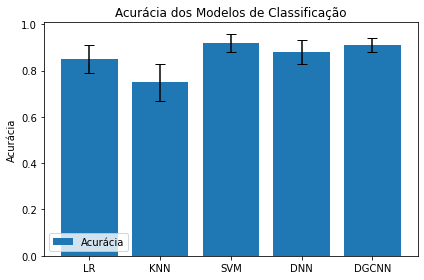

In [2]:
import matplotlib.pyplot as plt

# Dados de acurácia e desvio padrão para cada modelo
model_names = ['LR', 'KNN', 'SVM', 'DNN', 'DGCNN']
accuracy = [0.85, 0.75, 0.92, 0.88, 0.91]
std_dev = [0.06, 0.08, 0.04, 0.05, 0.03]

# Criar uma figura e eixos
fig, ax = plt.subplots()

# Barra de acurácia
ax.bar(model_names, accuracy, yerr=std_dev, capsize=5, label='Acurácia')

# Configurações do gráfico
ax.set_ylabel('Acurácia')
ax.set_title('Acurácia dos Modelos de Classificação')
ax.legend()

# Mostrar o gráfico
plt.tight_layout()
plt.show()

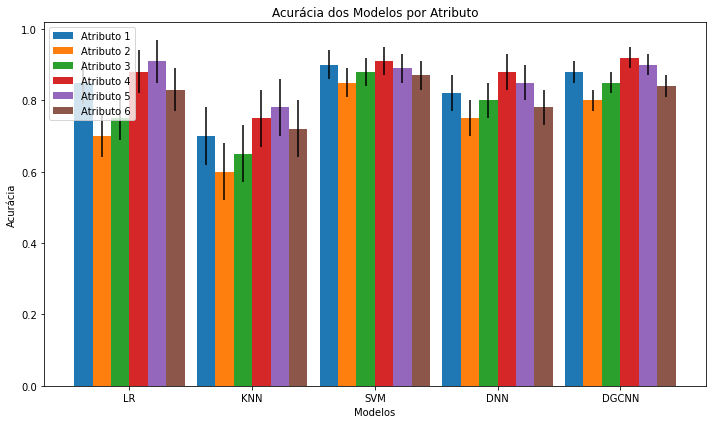

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Dados de atributos para cada modelo
model_names = ['LR', 'KNN', 'SVM', 'DNN', 'DGCNN']
attributes = ['Atributo 1', 'Atributo 2', 'Atributo 3', 'Atributo 4', 'Atributo 5', 'Atributo 6']
data = np.array([
    [0.85, 0.70, 0.75, 0.88, 0.91, 0.83],
    [0.70, 0.60, 0.65, 0.75, 0.78, 0.72],
    [0.90, 0.85, 0.88, 0.91, 0.89, 0.87],
    [0.82, 0.75, 0.80, 0.88, 0.85, 0.78],
    [0.88, 0.80, 0.85, 0.92, 0.90, 0.84]
])

std_dev = [0.06, 0.08, 0.04, 0.05, 0.03]


# Configurações do gráfico
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.15
x = np.arange(len(model_names))

# Plotar as barras para cada atributo
for i, attr in enumerate(attributes):
    ax.bar(x + i * bar_width, data[:, i], bar_width, yerr=std_dev, label=attr)

# Configurações dos eixos e legenda
ax.set_xlabel('Modelos')
ax.set_ylabel('Acurácia')
ax.set_title('Acurácia dos Modelos por Atributo')
ax.set_xticks(x + (len(attributes) - 1) * bar_width / 2)
ax.set_xticklabels(model_names)
ax.legend()

# Mostrar o gráfico
plt.tight_layout()
plt.show()

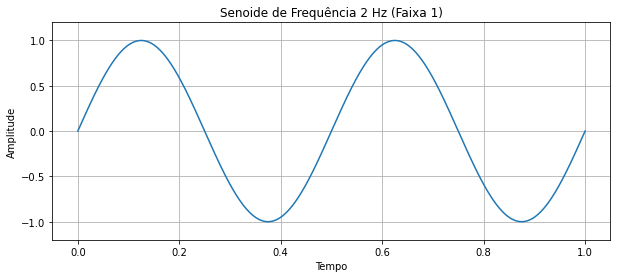

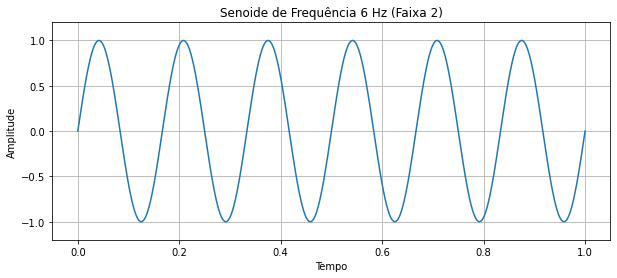

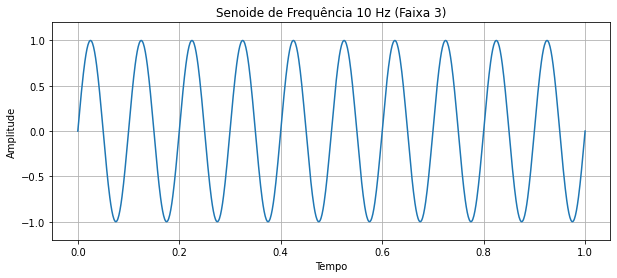

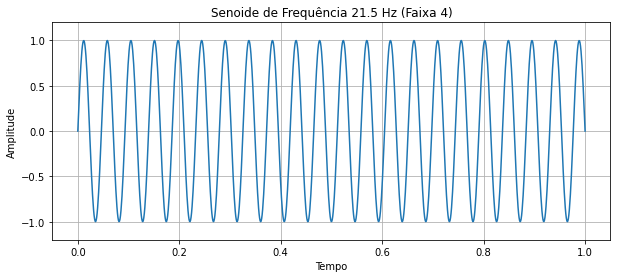

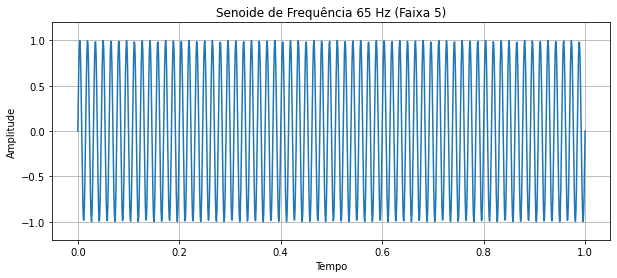

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Frequências do EEG e suas faixas
frequencies = [2, 6, 10, 21.5, 65]

# Criação do eixo de tempo
time = np.linspace(0, 1, num=1000)

# Criação dos gráficos de senoides para cada faixa de frequência
for i, freq in enumerate(frequencies):
    signal = np.sin(2 * np.pi * freq * time)
    plt.figure(figsize=(10, 4))
    plt.plot(time, signal)
    plt.title(f'Senoide de Frequência {freq} Hz (Faixa {i+1})')
    plt.xlabel('Tempo')
    plt.ylabel('Amplitude')
    plt.ylim(-1.2, 1.2)
    plt.grid()
    plt.show()

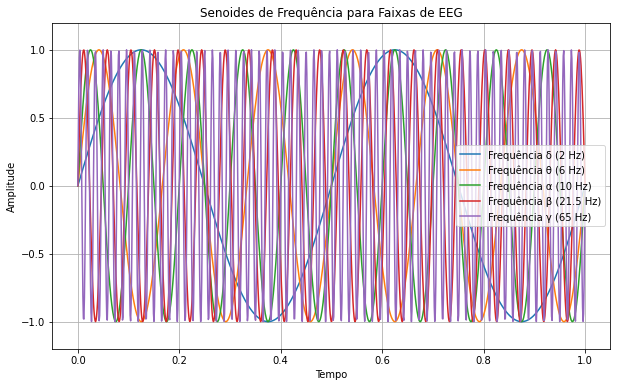

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Frequências do EEG e suas faixas
frequencies = [2, 6, 10, 21.5, 65]
labels = ['δ', 'θ', 'α', 'β', 'γ']

# Criação do eixo de tempo
time = np.linspace(0, 1, num=1000)

# Criação da imagem com todas as senoides
plt.figure(figsize=(10, 6))

for freq, label in zip(frequencies, labels):
    signal = np.sin(2 * np.pi * freq * time)
    plt.plot(time, signal, label=f'Frequência {label} ({freq} Hz)')

plt.title('Senoides de Frequência para Faixas de EEG')
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.ylim(-1.2, 1.2)
plt.legend()
plt.grid()
plt.show()
